In [2]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           1386          5  0.1764706        


In [3]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..


C:\Users\Sanghyun_Ryu\Machine-Learning-Projects



  0%|          | 0.00/691M [00:00<?, ?B/s]
  0%|          | 1.00M/691M [00:00<03:07, 3.87MB/s]
  1%|          | 4.00M/691M [00:00<00:56, 12.7MB/s]
  1%|          | 6.00M/691M [00:00<00:49, 14.6MB/s]
  2%|1         | 12.0M/691M [00:00<00:25, 27.5MB/s]
  2%|2         | 16.0M/691M [00:00<00:27, 25.7MB/s]
  3%|2         | 19.0M/691M [00:00<00:29, 24.1MB/s]
  3%|3         | 23.0M/691M [00:01<00:25, 27.3MB/s]
  4%|3         | 26.0M/691M [00:01<00:24, 28.3MB/s]
  4%|4         | 29.0M/691M [00:01<00:27, 25.6MB/s]
  5%|5         | 36.0M/691M [00:01<00:21, 31.3MB/s]
  6%|6         | 42.0M/691M [00:01<00:18, 37.2MB/s]
  7%|6         | 46.0M/691M [00:01<00:20, 33.0MB/s]
  7%|7         | 50.0M/691M [00:02<00:26, 25.5MB/s]
  8%|7         | 54.0M/691M [00:02<00:23, 27.9MB/s]
  9%|8         | 59.0M/691M [00:02<00:20, 32.0MB/s]
  9%|9         | 63.0M/691M [00:02<00:20, 32.7MB/s]
 10%|9         | 67.0M/691M [00:02<00:20, 31.4MB/s]
 11%|#         | 73.0M/691M [00:02<00:20, 31.0MB/s]
 11%|#1        | 79.

In [11]:
from zipfile import ZipFile

In [17]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile("Dog Breed Prediction/dogbreedidfromcomp.zip", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall('Dog Breed Prediction')

In [16]:
import os

In [21]:
os.remove('Dog Breed Prediction/sample_submission.csv')

In [23]:
conda install tensorflow

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done





==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: C:\Users\Seedevice\anaconda3\envs\pytorchenv

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    absl-py-0.15.0             |     pyhd3eb1b0_0         103 KB
    astor-0.8.1                |   py37haa95532_0          47 KB
    gast-0.5.3                 |     pyhd3eb1b0_0          21 KB
    grpcio-1.42.0              |   py37hc60d5dd_0         1.8 MB
    h5py-2.8.0                 |   py37hf7173ca_2         662 KB
    hdf5-1.8.20                |       hac2f561_1         9.4 MB
    keras-2.3.1                |                0           6 KB
    keras-applications-1.0.8   |             py_1          29 KB
    keras-base-2.3.1           |           py37_0         485 KB
    keras-preprocessing-1.1.2  |     pyhd3eb1b0_0          35 KB
    li

In [25]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam



In [31]:
import tensorflow as tf
from tensorflow.python.client import device_lib
gpus = tf.config.list_physical_devices('GPU')

In [32]:
gpus

[]

In [21]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15538609787661070644,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7173959366530718019
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10252580124830504326
 physical_device_desc: "device: XLA_GPU device"]

In [23]:
tf.test.is_built_with_cuda()

True

In [3]:
labels_all = pd.read_csv("labels.csv")

In [4]:
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [6]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [12]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|███████████████████████████████████████████████████████████████████████████████| 357/357 [00:01<00:00, 285.47it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [16]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 16)        25104     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 8)        

In [17]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [33]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 6s 3s/step - loss: 4.6302 - accuracy: 0.3438 - val_loss: 4.6237 - val_accuracy: 0.3231
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 4.6055 - accuracy: 0.3438 - val_loss: 4.6004 - val_accuracy: 0.3231
Epoch 3/100
2/2 [==============================] - 7s 3s/step - loss: 4.5797 - accuracy: 0.3555 - val_loss: 4.5773 - val_accuracy: 0.3231
Epoch 4/100
2/2 [==============================] - 7s 3s/step - loss: 4.5544 - accuracy: 0.3633 - val_loss: 4.5540 - val_accuracy: 0.3385
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 4.5290 - accuracy: 0.3711 - val_loss: 4.5308 - val_accuracy: 0.3538
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 4.5031 - accuracy: 0.3906 - val_loss: 4.5072 - val_accuracy: 0.3538
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 4.4779 - accuracy: 0.4102 - val_loss: 4.4835 - val_accuracy: 0.3538
Epoch 8/100
2/2 [=================

2/2 [==============================] - 6s 3s/step - loss: 2.9173 - accuracy: 0.9180 - val_loss: 3.4699 - val_accuracy: 0.6308
Epoch 61/100
2/2 [==============================] - 6s 3s/step - loss: 2.8907 - accuracy: 0.9297 - val_loss: 3.4826 - val_accuracy: 0.6462
Epoch 62/100
2/2 [==============================] - 7s 3s/step - loss: 2.8836 - accuracy: 0.9258 - val_loss: 3.4578 - val_accuracy: 0.6308
Epoch 63/100
2/2 [==============================] - 6s 3s/step - loss: 2.8629 - accuracy: 0.9336 - val_loss: 3.4514 - val_accuracy: 0.6462
Epoch 64/100
2/2 [==============================] - 6s 3s/step - loss: 2.8469 - accuracy: 0.9375 - val_loss: 3.4459 - val_accuracy: 0.6769
Epoch 65/100
2/2 [==============================] - 6s 3s/step - loss: 2.8302 - accuracy: 0.9297 - val_loss: 3.4437 - val_accuracy: 0.6615
Epoch 66/100
2/2 [==============================] - 6s 3s/step - loss: 2.8167 - accuracy: 0.9453 - val_loss: 3.4291 - val_accuracy: 0.6308
Epoch 67/100
2/2 [======================

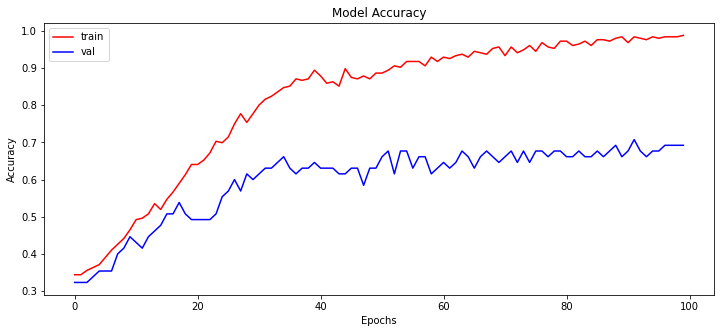

In [34]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [35]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 17ms/step - loss: 2.6790 - accuracy: 0.8333
Accuracy over the test set: 
  83.33 %


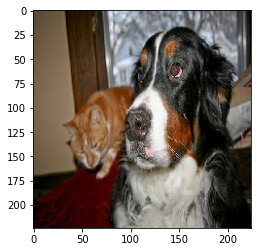

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [36]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [37]:
model.save("dog_breed.h5")